Covid-19 Exploratory Data Analysis using Python

The Objective of this project is to analyze global COVID-19 data to understand trends in confirmed cases and deaths across continents,and to extract meaningful insights using exploratory data analysis techniques

The Dataset Source
THe dataset used in this analysis was obtained from a publicly available COVID-19 data repository.It contains information on COVID-19 cases,deaths, and related socio-economic indicators across multiple countries
source:Kaggle

In [1]:
##importing required libraries.The following libraries were used for data manipulation and visualization.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Loading

In [2]:
##The dataset is loaded into a pandas dataframe for futher analysis.
df=pd.read_csv(r"C:\Users\bharg\Downloads\archive\owid-covid-data.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


Feature Selection and Data Reduction
The Original dataset contains multiple columns related to COVID-19 statistics.For this analysis,only relevant features were selected to focus on country-wise,continent-wise and time-based trends.Irrelevant columns were excluded to simplify the analysis and reduce noise.


In [3]:
df_filtered=df.filter(['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index'])
print(df_filtered)

      continent       location        date  total_cases  total_deaths  \
0          Asia    Afghanistan  2019-12-31          0.0           0.0   
1          Asia    Afghanistan  2020-01-01          0.0           0.0   
2          Asia    Afghanistan  2020-01-02          0.0           0.0   
3          Asia    Afghanistan  2020-01-03          0.0           0.0   
4          Asia    Afghanistan  2020-01-04          0.0           0.0   
...         ...            ...         ...          ...           ...   
44780       NaN  International  2020-09-15        696.0           7.0   
44781       NaN  International  2020-09-16        696.0           7.0   
44782       NaN  International  2020-09-17        696.0           7.0   
44783       NaN  International  2020-09-18        696.0           7.0   
44784       NaN  International  2020-09-19        696.0           7.0   

       gdp_per_capita  human_development_index  
0            1803.987                    0.498  
1            1803.987    

Data Cleaning
This step invloves handling missing values,removing duplicates and ensuring that the data types are appropriate for analysis.

In [4]:
df_filtered.drop_duplicates()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,2019-12-31,0.0,0.0,1803.987,0.498
1,Asia,Afghanistan,2020-01-01,0.0,0.0,1803.987,0.498
2,Asia,Afghanistan,2020-01-02,0.0,0.0,1803.987,0.498
3,Asia,Afghanistan,2020-01-03,0.0,0.0,1803.987,0.498
4,Asia,Afghanistan,2020-01-04,0.0,0.0,1803.987,0.498
...,...,...,...,...,...,...,...
44780,NaN,International,2020-09-15,696.0,7.0,NaN,NaN
44781,NaN,International,2020-09-16,696.0,7.0,NaN,NaN
44782,NaN,International,2020-09-17,696.0,7.0,NaN,NaN
44783,NaN,International,2020-09-18,696.0,7.0,NaN,NaN


Handling missing values
Missing values were identified to ensure accurate analysis of COVID-19 trends.

In [5]:
non_numeric=df_filtered.dropna(subset=['continent','gdp_per_capita','human_development_index'])
print(non_numeric)

      continent     location        date  total_cases  total_deaths  \
0          Asia  Afghanistan  2019-12-31          0.0           0.0   
1          Asia  Afghanistan  2020-01-01          0.0           0.0   
2          Asia  Afghanistan  2020-01-02          0.0           0.0   
3          Asia  Afghanistan  2020-01-03          0.0           0.0   
4          Asia  Afghanistan  2020-01-04          0.0           0.0   
...         ...          ...         ...          ...           ...   
44252    Africa     Zimbabwe  2020-09-15       7531.0         224.0   
44253    Africa     Zimbabwe  2020-09-16       7576.0         224.0   
44254    Africa     Zimbabwe  2020-09-17       7598.0         224.0   
44255    Africa     Zimbabwe  2020-09-18       7633.0         224.0   
44256    Africa     Zimbabwe  2020-09-19       7647.0         224.0   

       gdp_per_capita  human_development_index  
0            1803.987                    0.498  
1            1803.987                    0.498  


In [6]:
df_filtered.select_dtypes(include='number').columns

Index(['total_cases', 'total_deaths', 'gdp_per_capita',
       'human_development_index'],
      dtype='object')

In [7]:
covid_cols=df_filtered[['total_cases','total_deaths']]
covid_cols.fillna(0)

,total_cases,total_deaths
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
44780,696.0,7.0
44781,696.0,7.0
44782,696.0,7.0
44783,696.0,7.0


In [8]:
df_filtered['date']=pd.to_datetime(df_filtered['date'])

In [9]:
df_filtered['month']=df_filtered['date'].dt.month_name()

Date Formatting..
Date column was converted to datetime format to enable time-based analysis such as monthly trends

In [118]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44785 entries, 0 to 44784
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   continent                44257 non-null  object        
 1   location                 44785 non-null  object        
 2   date                     44785 non-null  datetime64[ns]
 3   total_cases              44182 non-null  float64       
 4   total_deaths             44182 non-null  float64       
 5   gdp_per_capita           39442 non-null  float64       
 6   human_development_index  38558 non-null  float64       
 7   month                    44785 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 2.7+ MB


Exploratory Data Analysis(EDA)
Analysis Questions
1.How did COVID-19 cases and deaths evolve over the time?
2.Which Continents were most affected by COVID-19?
3.Which countries reported the highest total cases and deaths?

Monthly Trend Analysis
This section analyzes monthly trends in COVID-19 cases and deaths to understand the progression of the pandemic over time.

In [119]:
monthly_data=df_filtered.groupby('month')[['total_cases','total_deaths']].sum()
print(monthly_data)

            total_cases  total_deaths
month                                
April      1.208007e+08     8143965.0
August     1.327333e+09    47264608.0
December   5.400000e+01           0.0
February   3.262874e+06       90184.0
January    7.682200e+04        1766.0
July       8.472828e+08    36181972.0
June       4.815321e+08    26150759.0
March      1.691433e+07      706491.0
May        2.809972e+08    18825664.0
September  1.062605e+09    34288871.0


<Axes: title={'center': 'Monthly COVID-19 Total cases'}, xlabel='Month', ylabel='Total Cases'>

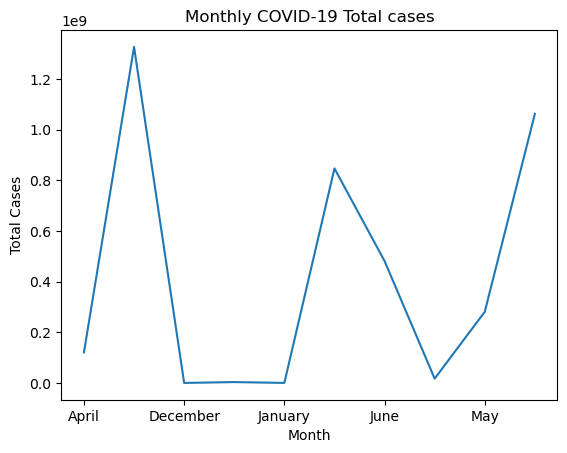

In [120]:
monthly_data['total_cases'].plot(title='Monthly COVID-19 Total cases',ylabel='Total Cases',xlabel='Month')

<Axes: title={'center': 'Monthly COVID-19 Total cases'}, xlabel='Month', ylabel='Total Deaths'>

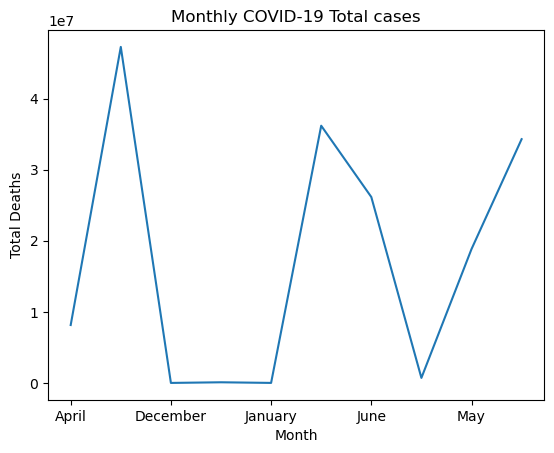

In [121]:
monthly_data['total_deaths'].plot(title='Monthly COVID-19 Total cases',ylabel='Total Deaths',xlabel='Month')

COVID-19 cases and deaths show noticeable peaks during specific months

Continent Wise Analysis

<Axes: title={'center': 'Total COVID-19 Cases by Continent'}, xlabel='continent'>

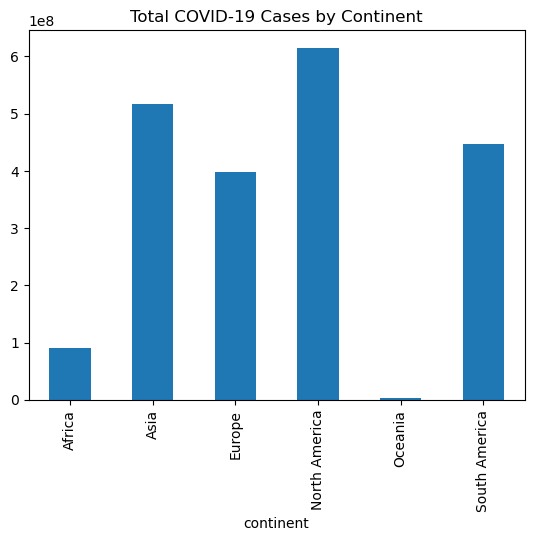

In [122]:
continent_cases=df_filtered.groupby('continent')['total_cases'].sum()
continent_cases.plot(kind='bar',title='Total COVID-19 Cases by Continent')

From the bar plot it is showing that North America had more cases

Top Affected Countries

<Axes: title={'center': 'Top 10 most affected countries by COVID-19'}, xlabel='location'>

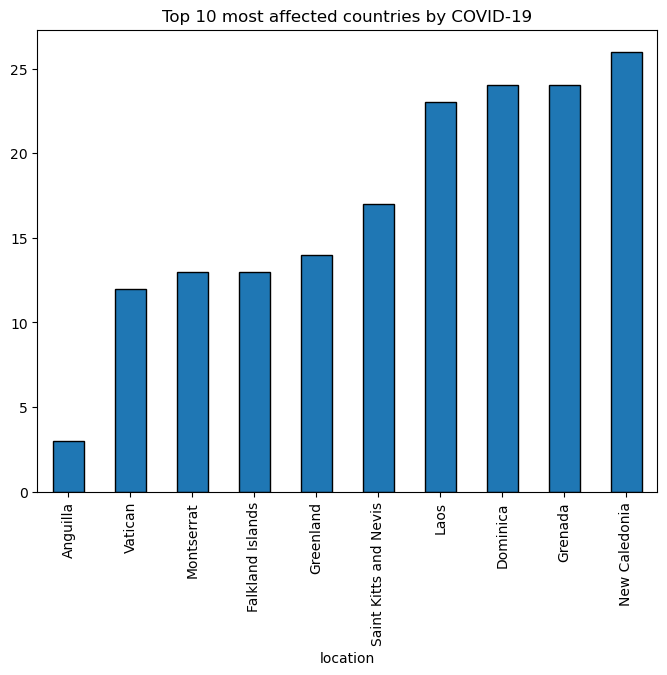

In [123]:
top_countries=df.groupby('location')['total_cases'].max().sort_values(ascending=True).head(10)
top_countries.plot(kind='bar',title='Top 10 most affected countries by COVID-19',edgecolor='black',figsize=(8,6))

Amoung all the countries these 10 countries had affected by the COVID-19 pandemic more.

#Key Insights
-COVID-19 cases peaked during specific months,suggesting multiple waves.
-North America and Asia reported higher cummulative cases compared to other regions.
-The top most affected countries of COVID-19 globally are New Caledonia,Grenada,Dominica,Laos.

#Conclusion
-This analysis highlights global COVID-19 trends across the time and region.

#Future Scope
-Include Vaccination data
-Perform predictive modeling